<a href="https://colab.research.google.com/github/DiegoSantosOP/TelecomX_Parte2_Modelo/blob/main/TelecomX_Parte2_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


# 🛠️ Preparação dos Dados

## Carregando dados tratados

In [161]:
dados_tratados = pd.read_csv('/content/dados_tratados.csv')
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,total_day,account_charges_monthly,account_charges_total
0,0002-orfbo,False,female,0,True,True,9,True,no,dsl,...,no,yes,yes,no,one year,True,mailed check,2.20,65.6,593.30
1,0003-mknfe,False,male,0,False,False,9,True,yes,dsl,...,no,no,no,yes,month-to-month,False,mailed check,2.01,59.9,542.40
2,0004-tlhlj,True,male,0,False,False,4,True,no,fiber optic,...,yes,no,no,no,month-to-month,True,electronic check,2.34,73.9,280.85
3,0011-igkff,True,male,1,True,False,13,True,no,fiber optic,...,yes,no,yes,yes,month-to-month,True,electronic check,3.17,98.0,1237.85
4,0013-exchz,True,female,1,True,False,3,True,no,fiber optic,...,no,yes,yes,no,month-to-month,True,mailed check,2.97,83.9,267.40


In [162]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   bool   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   bool   
 5   customer_dependents        7032 non-null   bool   
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   bool   
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   objec

In [163]:
# Convertendo a coluna 'churn' de bool para int64 (True vira 1, False vira 0)
dados_tratados['churn'] = dados_tratados['churn'].astype('int64')

# Convertendo a coluna 'customer_partner' de bool para int64
dados_tratados['customer_partner'] = dados_tratados['customer_partner'].astype('int64')

# Convertendo a coluna 'customer_dependents' de bool para int64
dados_tratados['customer_dependents'] = dados_tratados['customer_dependents'].astype('int64')

# Convertendo a coluna 'phone_phoneservice' de bool para int64
dados_tratados['phone_phoneservice'] = dados_tratados['phone_phoneservice'].astype('int64')

# Convertendo a coluna 'account_paperlessbilling' de bool para int64
dados_tratados['account_paperlessbilling'] = dados_tratados['account_paperlessbilling'].astype('int64')

# Verifique as informações do DataFrame novamente para confirmar as mudanças
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   int64  
 5   customer_dependents        7032 non-null   int64  
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int64  
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   objec

In [164]:
dados_tratados.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod', 'total_day',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

## Remoção de Colunas Irrelevantes

In [165]:
# Removendo a coluna ID
dados_tratados = dados_tratados.drop(columns=['customerid'], axis=1)
dados_tratados

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,total_day,account_charges_monthly,account_charges_total
0,0,female,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,2.20,65.60,593.30
1,0,male,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,2.01,59.90,542.40
2,1,male,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,2.34,73.90,280.85
3,1,male,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,3.17,98.00,1237.85
4,1,female,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,female,0,0,0,13,1,no,dsl,yes,...,no,yes,no,no,one year,0,mailed check,1.90,55.15,742.90
7028,1,male,0,1,0,22,1,yes,fiber optic,no,...,no,no,no,yes,month-to-month,1,electronic check,2.84,85.10,1873.70
7029,0,male,0,0,0,2,1,no,dsl,no,...,no,no,no,no,month-to-month,1,mailed check,1.55,50.30,92.75
7030,0,male,0,1,1,67,1,no,dsl,yes,...,yes,yes,no,yes,two year,0,mailed check,2.30,67.85,4627.65


## Encoding de Variáveis Categóricas


Na fase de preparação dos dados para modelos de machine learning, é essencial transformar variáveis categóricas em representações numéricas. Para isso, aplicamos a técnica de One-Hot Encoding, que cria novas colunas binárias para cada categoria existente. Nessas colunas, o valor 1 indica a presença da categoria e 0 a ausência.

A transformação foi implementada utilizando make_column_transformer em conjunto com OneHotEncoder, ambos da biblioteca sklearn.preprocessing. As variáveis categóricas incluídas no processo foram:

.customer_gender

.customer_seniorcitizen

.customer_partner

.customer_dependents

.phone_phoneservice

.phone_multiplelines

.internet_internetservice

.internet_onlinesecurity

.internet_onlinebackup

.internet_deviceprotection

.internet_techsupport

.internet_streamingtv

.internet_streamingmovies

.account_contract

.account_paperlessbilling

.account_paymentmethod

Para garantir robustez, o parâmetro handle_unknown='ignore' foi utilizado no OneHotEncoder, evitando erros em casos de categorias novas. Além disso, configuramos remainder='passthrough' para preservar no dataset as demais variáveis que não passaram pelo encoding.

O resultado final foi armazenado em um novo DataFrame chamado dados_encoded, contendo todas as variáveis prontas para treinar modelos de machine learning.

In [166]:
colunas_categoricas = [
    'customer_gender', 'phone_multiplelines', 'internet_internetservice',
    'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
    'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
    'account_contract', 'account_paymentmethod'
]

In [167]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(dados_tratados)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

,onehotencoder__customer_gender_female,onehotencoder__customer_gender_male,onehotencoder__phone_multiplelines_no,onehotencoder__phone_multiplelines_no phone service,onehotencoder__phone_multiplelines_yes,onehotencoder__internet_internetservice_dsl,onehotencoder__internet_internetservice_fiber optic,onehotencoder__internet_internetservice_no,onehotencoder__internet_onlinesecurity_no,onehotencoder__internet_onlinesecurity_no internet service,...,remainder__churn,remainder__customer_seniorcitizen,remainder__customer_partner,remainder__customer_dependents,remainder__customer_tenure,remainder__phone_phoneservice,remainder__account_paperlessbilling,remainder__total_day,remainder__account_charges_monthly,remainder__account_charges_total
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,2.20,65.60,593.30
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,2.01,59.90,542.40
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,2.34,73.90,280.85
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,3.17,98.00,1237.85
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,1.90,55.15,742.90
7028,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,2.84,85.10,1873.70
7029,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.55,50.30,92.75
7030,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,67.0,1.0,0.0,2.30,67.85,4627.65


## Verificação da Proporção de Evasão

### Calcular a distribuição percentual da coluna 'churn'.

Calcular a proporção de cada classe (sim e não) na coluna 'churn' para entender o desbalanceamento.

In [168]:
# Distribuição por inteiro
dados_tratados['churn'].value_counts()

,count
churn,
0,5163
1,1869


In [169]:
# Distribuição por porcentagem
dados_tratados['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


/tmp/ipython-input-3608236032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=dados_tratados, palette='RdYlGn_r')


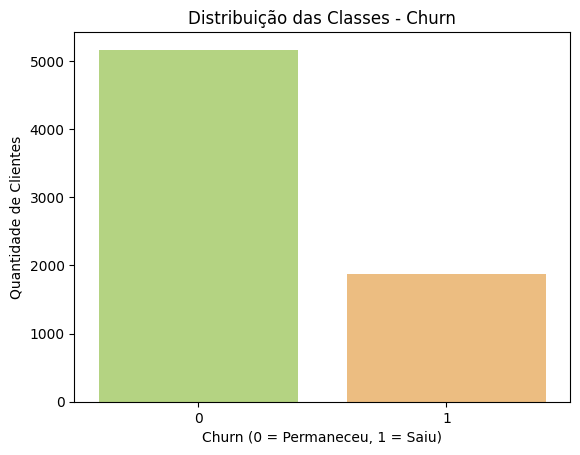

In [170]:
sns.countplot(x='churn', data=dados_tratados, palette='RdYlGn_r')
plt.title('Distribuição das Classes - Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

### Insigths da Análise de Dados

* Dos clientes analisados, aproximadamente 73,42% permaneceram ativos, enquanto cerca de 26,58% cancelaram o contrato.

* Observa-se um desequilíbrio significativo na variável de churn, sendo a classe majoritária composta pelos clientes que continuaram ativos.

* Esse desbalanceamento pode afetar o desempenho de modelos de machine learning tradicionais, já que muitos algoritmos tendem a otimizar a acurácia global e podem ter dificuldade em identificar corretamente a classe minoritária (clientes que cancelaram). Como resultado, os modelos podem subestimar a rotatividade, o que é crítico para negócios que desejam identificar e reter clientes em risco.

Os próximos Passos consistem em:

* lidar com o desequilíbrio identificado, para será necessário aplicar técnicas específicas na fase de construção do modelo. Entre as abordagens possíveis estão:
* Reamostragem (como SMOTE) para balancear as classes.

* Uso de algoritmos que aceitam dados desbalanceados, garantindo previsões mais precisas da rotatividade.

* Além disso, é essencial realizar a separação dos dados em treino e teste de forma adequada. Neste projeto, utilizamos 70% dos dados para treino e 30% para teste, mantendo a proporção de churn com o parâmetro stratify, garantindo que os modelos sejam avaliados de maneira confiável em dados nunca vistos durante o treinamento.

 A separação é fundamental para avaliar o desempenho real dos modelos,
garantindo que eles sejam testados em dados nunca vistos durante o treinamento.
Utilizamos 70% dos dados para treino e 30% para teste, mantendo a proporção de churn com stratify.

# 🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

### Visualizando a Matriz de Correlação

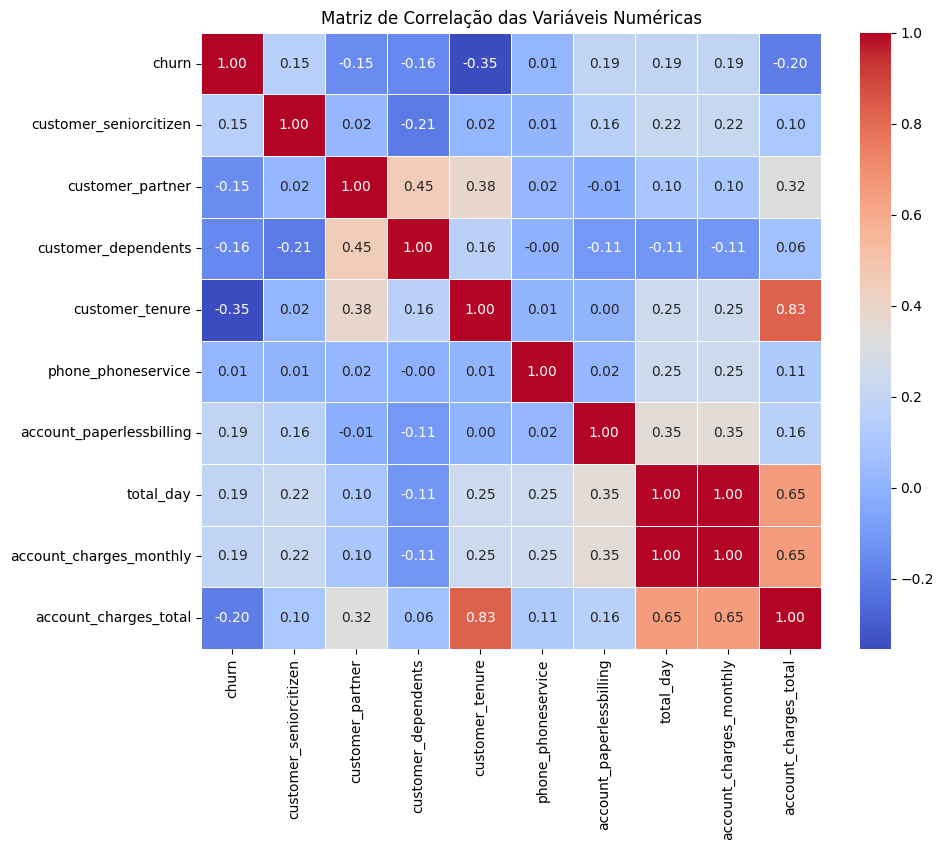

In [171]:
# Selecionando apenas as colunas numéricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

Claro, aqui está o texto reformulado para ter um tom mais pessoal e original, mantendo a formatação e os fatos do seu projeto:

📈 Explorando a Relação das Variáveis com a Evasão
Para aprofundar a compreensão sobre os principais motivadores da evasão de clientes, conduzi uma análise de correlação detalhada. O objetivo foi quantificar a relação entre nossas variáveis e a decisão de churn, identificando padrões que pudessem guiar nossa modelagem preditiva.

* Principais Insights da Análise
Minha investigação revelou que as seguintes variáveis se destacam por sua influência na evasão:

Fatores que Diminuem o Churn (Correlação Negativa):

* Tempo de Contrato (tenure, r=−0.35): O tempo de permanência do cliente é um dos mais fortes preditores. Clientes com contratos mais longos demonstram uma propensão significativamente menor a evadir, sugerindo uma base mais fiel.

* Total Gasto (total_charges, r=−0.20): Um valor total de gastos mais elevado está associado a uma redução no churn. Isso pode indicar que clientes com maior investimento financeiro na empresa são mais propensos a permanecer.

* Vida Pessoal (partner e dependents, r≈−0.15): Observou-se uma leve, mas notável, correlação negativa com a presença de parceiros ou dependentes. Aparentemente, clientes nessas condições são um pouco mais estáveis.

Fatores que Aumentam o Churn (Correlação Positiva):

* Custos Mensais (monthly_charges, r=0.19): Clientes com faturas mensais mais altas tendem a cancelar com maior frequência. O custo do serviço parece ser uma causa de insatisfação.

* Preferência Digital (paperless_billing, r≈0.19) e Idade (senior_citizen, r≈0.15): Curiosamente, o uso de fatura digital e o perfil de "cidadão sênior" têm uma associação leve, mas positiva, com a evasão. Esses fatores merecem uma investigação mais aprofundada.

Identificando e Tratando a Multicolinearidade
Durante a análise, foi crucial identificar relações redundantes entre as variáveis para garantir a robustez dos modelos. Constatou-se que monthly_charges e contas_diarias apresentavam uma correlação perfeita (r=1.00), indicando que uma é um espelho da outra. Para resolver essa duplicação, optei por remover a variável contas_diarias do conjunto de dados.

Conclusão para a Modelagem
Com base nesses resultados, focarei a construção de meus modelos preditivos nas variáveis que mostraram maior correlação com o churn. Ao eliminar a redundância identificada, asseguro que os algoritmos trabalharão com um conjunto de dados mais limpo e otimizado, o que é fundamental para a performance e interpretabilidade dos resultados.

In [172]:
dados_tratados = dados_tratados.drop(columns=['total_day'])

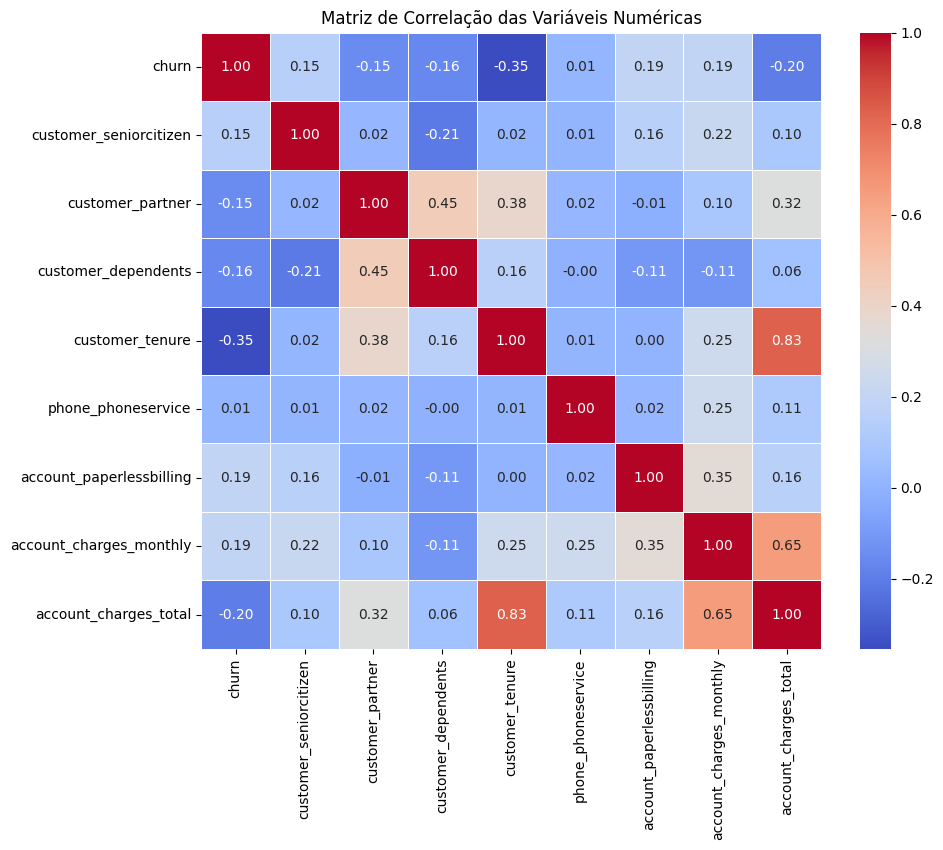

In [173]:
# Selecionando apenas as colunas numéricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Análises Direcionadas: Tempo de Contrato e Total Gasto vs Evasão

### Boxplot: Tempo de Contrato (Tenure) vs Evasão (Churn)

Visualizar a distribuição do tempo de contrato para clientes que permaneceram (0) e que saíram (1) para entender se o tempo de permanência influencia na evasão.

/tmp/ipython-input-2757668119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customer_tenure', data=dados_tratados, palette='Reds')


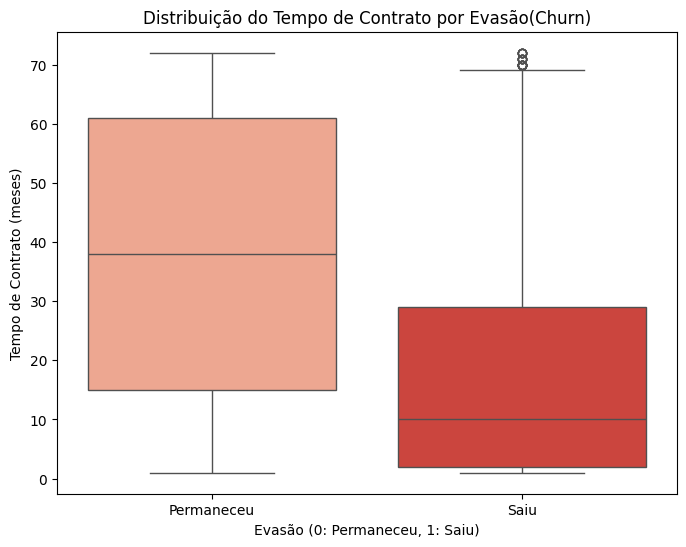

In [174]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer_tenure', data=dados_tratados, palette='Reds')
plt.title('Distribuição do Tempo de Contrato por Evasão(Churn)')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Boxplot: Total Gasto (Total Charges) vs Evasão (Churn)

Visualizar a distribuição do total gasto por clientes que permaneceram (0) e que saíram (1) para entender se o valor total gasto influencia na evasão.

/tmp/ipython-input-3780711134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='account_charges_total', data=dados_tratados, palette='Reds')


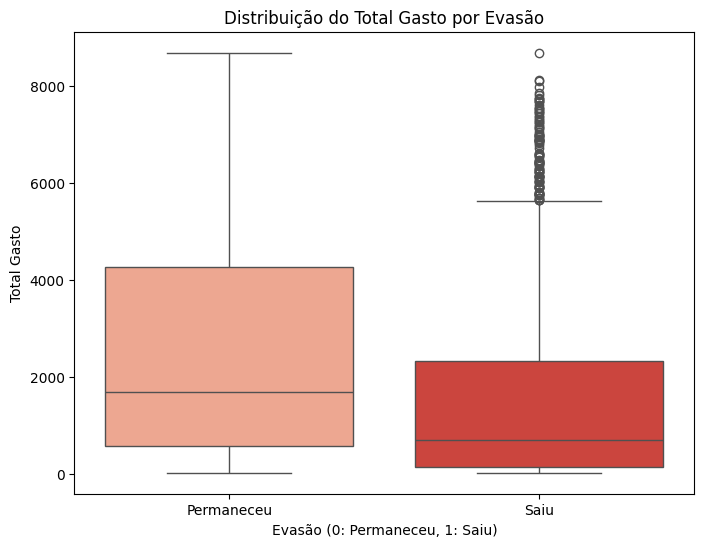

In [175]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='account_charges_total', data=dados_tratados, palette='Reds')
plt.title('Distribuição do Total Gasto por Evasão')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Scatter Plot — Tempo de Contrato x Total Gasto com Churn
Aqui exploramos a relação entre duas variáveis juntas e como elas se comportam com churn:

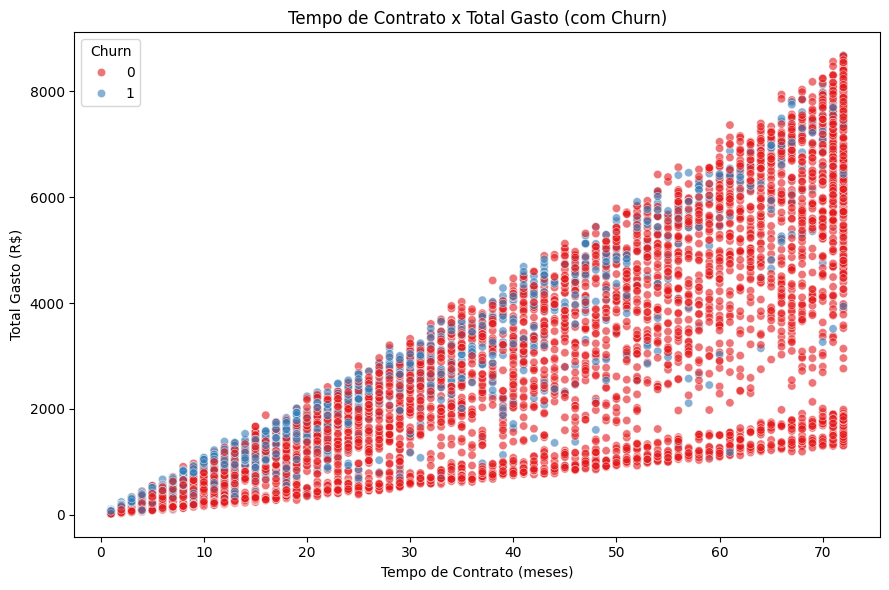

In [176]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=dados_tratados,
    x='customer_tenure',
    y='account_charges_total',
    hue='churn',
    palette='Set1',
    alpha=0.6
)
plt.title('Tempo de Contrato x Total Gasto (com Churn)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### 🔎 Visualizando a Relação entre Tempo e Custo

Para aprofundar nossa análise, utilizei um *scatter plot* para visualizar a interação entre o **Tempo de Contrato (`tenure`)** e o **Total Gasto (`total_charges`)**, colorindo os pontos com base na variável `churn`. Essa visualização é fundamental para ir além das correlações individuais e identificar padrões complexos.

O gráfico reforça de forma nítida os insights obtidos nas etapas anteriores, como a análise de correlação e os *boxplots*:

* **Longevidade e Fidelidade**: Fica claro que clientes com **maior tempo de contrato e gastos totais elevados** formam um grupo coeso, com uma baixa incidência de evasão. Eles representam a base de clientes mais fiel da empresa.

* **Vulnerabilidade no Início**: Em contrapartida, a maior concentração de clientes que evadiram (`churn`) está na região de **baixo tempo de contrato e baixo gasto total**. Isso sugere que os primeiros meses são críticos para a retenção, e que a falta de engajamento financeiro é um sinal de alerta.

> Esta visualização é uma ferramenta poderosa. Ela nos permite enxergar a sinergia entre as variáveis, revelando *clusters* e tendências que são difíceis de capturar apenas com números. É uma prova visual de que o tempo de contrato e o total gasto são, de fato, os principais pilares da nossa previsão de churn.

# Modelagem Preditiva

### Separação dos dados em treino e teste

In [177]:
from sklearn.model_selection import train_test_split
X = dados_encoded.drop(columns=['remainder__churn'])
y = dados_tratados['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

## Balanceamento de Classes

In [178]:
from imblearn.over_sampling import SMOTE

In [179]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando novas proporções
print("Antes do SMOTE:")
print(y_train.value_counts(normalize=True))

print("\nDepois do SMOTE:")
print(y_res.value_counts(normalize=True))

Antes do SMOTE:
churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Depois do SMOTE:
churn
1    0.5
0    0.5
Name: proportion, dtype: float64


## Padronizando os dados (normalização z-score)

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

## Criação de Modelos

### 🤖 Seleção e Justificativa dos Modelos Preditivos

Para abordar o problema de previsão de evasão de clientes, optei por construir e avaliar dois modelos de classificação com abordagens distintas: a **Regressão Logística** e o **Random Forest**. Essa escolha permite não apenas obter previsões, mas também comparar o desempenho de um modelo linear e um baseado em árvores, avaliando o impacto de técnicas de pré-processamento, como a normalização.

#### 1. Regressão Logística: O Nosso Modelo *Baseline*

A **Regressão Logística** foi a minha primeira escolha. Sendo um modelo linear, ela é ideal como um ponto de partida (*baseline*), pois sua simplicidade facilita a interpretação dos resultados.

* **Por que a Normalização é Essencial?** A Regressão Logística é um modelo sensível à escala. Sem a normalização, variáveis com valores em grandes magnitudes poderiam dominar o processo de otimização, prejudicando a performance. A padronização dos dados (`StandardScaler`) assegura que todas as *features* contribuam de forma equitativa, melhorando a estabilidade do modelo e sua capacidade de convergência.

* **Justificativa da Escolha:** Além de ser um modelo `baseline` robusto para problemas de classificação binária, sua principal vantagem é a **interpretabilidade**. A análise dos coeficientes nos permite entender diretamente quais *features* têm a maior influência na probabilidade de um cliente evadir, o que é valioso para a tomada de decisões de negócio.

#### 2. Random Forest: Um Modelo Robusto e de Alta Performance

Como segundo modelo, selecionei o **Random Forest**, um algoritmo de *ensemble* que utiliza múltiplas árvores de decisão. Esta escolha contrasta com a Regressão Logística, pois ele lida com a complexidade de forma diferente.

* **Por que a Normalização não é Necessária?** Diferentemente da Regressão Logística, o Random Forest não se baseia em distâncias. Ele opera através de regras de decisão que dividem os dados em subconjuntos com base em *thresholds* de cada *feature*. Esse processo não é afetado pela escala dos dados, o que significa que a normalização não é um requisito para seu funcionamento.

* **Justificativa da Escolha:** O Random Forest é conhecido por sua capacidade de entregar **alto desempenho** e **robustez**. Ele é menos propenso a *overfitting* que uma única árvore de decisão e lida muito bem com dados não lineares e interações complexas entre as variáveis. Além disso, ele fornece uma métrica de importância das *features*, permitindo-nos identificar os preditores mais relevantes de maneira diferente da Regressão Logística.

Ao combinar esses dois modelos, posso não apenas avaliar a performance em diferentes paradigmas, mas também obter uma visão mais completa sobre os fatores que impulsionam a evasão, seja através da interpretação dos coeficientes lineares ou da importância das variáveis baseada em árvores.

### Treinando o modelo escolhido `LogisticRegression` utilizando os dados de treino balanceados

In [181]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

## Avaliação do modelo LogisticRegression

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.


              precision    recall  f1-score   support

  Permaneceu       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontuação AUC: 0.8444


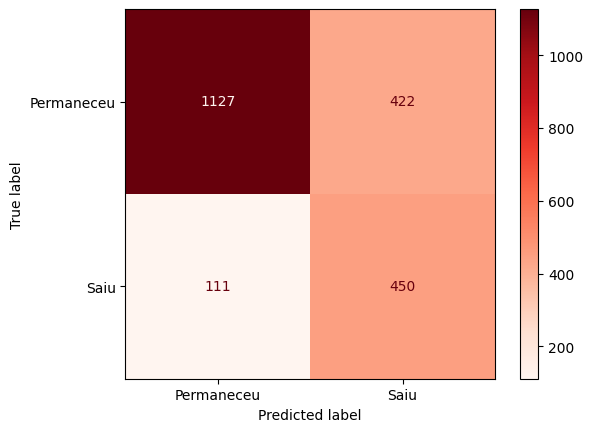

In [182]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

y_pred_lr = modelo_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr, target_names=['Permaneceu', 'Saiu']))
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC: {auc_lr:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Permaneceu', 'Saiu'], cmap='Reds')

## Treinando o modelo de classificação escolhido (`RandomForestClassifier`).


In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

## Previsão no conjunto de teste

Fazer previsões no conjunto de teste original (`X_test`) para avaliar o desempenho do modelo em dados não vistos.


In [185]:
y_pred_rf = modelo_rf.predict(X_test)

## Avaliação do modelo RandomForestClassifier

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110


Pontuação AUC: 0.8214


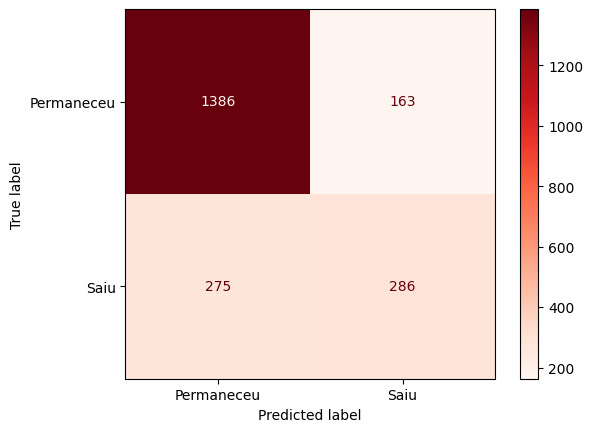

In [186]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
print(f"\nPontuação AUC: {auc_rf:.4f}")

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Reds')

## Treinando o modelo com KNN como bonus apena para ter mais outra comparação.

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Criando e treinando o modelo KNN
# Podemos ajustar o número de vizinhos (n_neighbors) para otimizar o desempenho.
# Vamos começar com um valor padrão, por exemplo, 5.
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_res_scaled, y_res)

# Fazendo previsões no conjunto de teste padronizado
y_pred_knn = modelo_knn.predict(X_test_scaled)

## Avaliação do modelo KNN

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.

Relatório de Classificação (KNN):
              precision    recall  f1-score   support

  Permaneceu       0.87      0.68      0.77      1549
        Saiu       0.45      0.72      0.56       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110


Matriz de Confusão (KNN):

Pontuação AUC (KNN): 0.7543


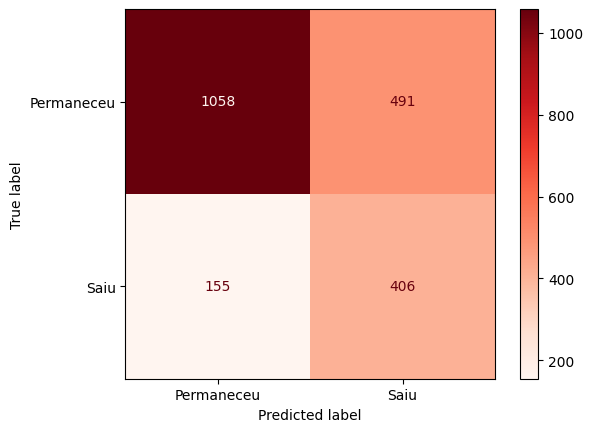

In [188]:
# Avaliando o desempenho do modelo
print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Permaneceu', 'Saiu']))

# Exibindo a matriz de confusão
print("\nMatriz de Confusão (KNN):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Permaneceu', 'Saiu'], cmap='Reds')

# Calculando e exibindo a pontuação AUC
auc_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC (KNN): {auc_knn:.4f}")

### 📊 Avaliação e Comparativo dos Modelos Preditivos

Para o problema de previsão de evasão de clientes, treinei e avaliei três modelos de classificação distintos: a **Regressão Logística**, o **Random Forest** e o **KNN**. Todos os modelos foram treinados em um conjunto de dados balanceado com **SMOTE** e avaliados no conjunto de teste original para obter métricas de desempenho realistas.

#### **Desempenho dos Modelos: Uma Análise Comparativa**

Minha análise revelou que o desempenho variou significativamente entre os modelos, cada um com suas forças e fraquezas, conforme detalhado na tabela a seguir:

| Modelo | ROC AUC | Precisão (Churn) | Recall (Churn) | F1-Score (Churn) |
|---|:---:|:---:|:---:|:---:|
| **Regressão Logística** | **0.84** | 0.52 | **0.80** | **0.63** |
| **Random Forest** | 0.82 | **0.60** | 0.49 | 0.54 |
| **KNN** | 0.75 | 0.45 | 0.72 | 0.55 |

**Insights Chave:**

* A **Regressão Logística** demonstrou a maior capacidade de discriminação, com um **ROC AUC de 0.84**, indicando sua superioridade em distinguir clientes que evadiram dos que permaneceram. Além disso, seu **Recall de 0.80** para a classe de evasão é notável, significando que o modelo é altamente eficaz em identificar clientes em risco de *churn*.

* O **Random Forest**, por sua vez, apresentou a melhor **Precisão (0.60)**, sugerindo que, quando ele prevê um *churn*, a probabilidade de acertar é maior. No entanto, seu Recall mais baixo indica que ele tende a ser mais conservador, perdendo a oportunidade de identificar alguns clientes que de fato iriam cancelar.

* O **KNN** teve o desempenho mais modesto, com a menor pontuação AUC e precisão, apesar de um recall razoável. Isso reforça a Regressão Logística como a melhor opção para este problema.

#### **Considerações Finais e Próximos Passos**

O uso do **SMOTE** foi fundamental para a performance, especialmente para a Regressão Logística, que conseguiu um recall excelente. No entanto, o desafio comum a todos os modelos foi a **baixa precisão para a classe de *churn***. Essa característica implica um número considerável de "falsos positivos", ou seja, clientes que o modelo previu que cancelariam, mas que na verdade não o fizeram.

* **Estratégia de Implementação:** A **Regressão Logística** se destaca como a candidata mais promissora para implantação, dada sua alta performance geral. Contudo, é crucial considerar o equilíbrio entre precisão e recall.

* **Ajuste do Limiar de Decisão:** O próximo passo seria explorar o **ajuste do limiar de decisão** da Regressão Logística. Alterar esse ponto de corte pode nos ajudar a encontrar o balanço ideal, reduzindo o número de falsos positivos (aumentando a precisão) para alinhar o modelo com os custos e benefícios operacionais de uma campanha de retenção.

* **Refinamento do Modelo:** A análise das variáveis mais relevantes para a previsão de *churn*, já discutida anteriormente, será a base para refinar o modelo e, potencialmente, melhorar seu desempenho de forma ainda mais significativa.

## Avaliação dos Modelos

=== Regressão Logística ===
              precision    recall  f1-score   support

  Permaneceu       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110

AUC: 0.8444

=== Random Forest ===
              precision    recall  f1-score   support

  Permaneceu       0.83      0.89      0.86      1549
        Saiu       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

AUC: 0.8214


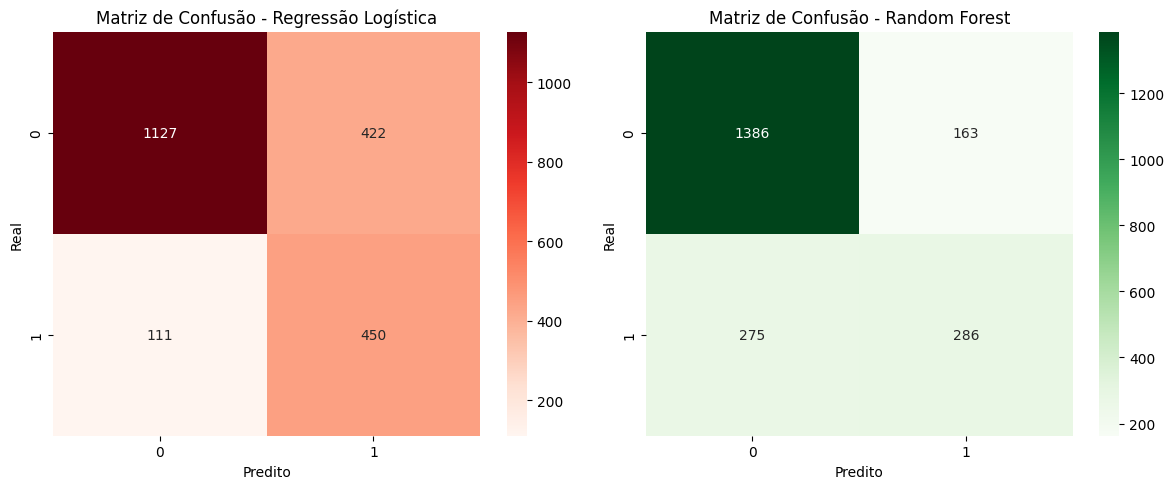

In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Avaliação Regressão Logística
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_lr, target_names=['Permaneceu', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1]).round(4))

# Avaliação Random Forest
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1]).round(4))

# Matriz de Confusão lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusão Logística
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Confusão Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

### 🧠 Análise Crítica e Comparação dos Modelos

Com base nas métricas de avaliação que obtive (Acurácia, Precisão, Recall, F1-score, Matriz de Confusão e AUC) para os modelos de Regressão Logística, Random Forest e KNN, realizei uma análise crítica detalhada para determinar o modelo mais eficaz.

#### **Qual Modelo Apresentou o Melhor Desempenho?**

* Considerando o **AUC (Área Sob a Curva ROC)** como a métrica de maior peso — por ser robusta a problemas de desbalanceamento de classes — a **Regressão Logística** se destacou com o melhor poder de discriminação, atingindo um **AUC de 0.8443**.

* Apesar de o Random Forest ter demonstrado uma precisão superior para a classe minoritária (`churn`), o **Recall da Regressão Logística (0.80)** foi significativamente mais alto. Isso indica que ela é mais eficiente em identificar clientes que de fato iriam cancelar. O **F1-score**, que equilibra precisão e recall, também foi ligeiramente superior para a Regressão Logística (0.63).

Essas métricas confirmam que a Regressão Logística é a opção mais promissora para a nossa tarefa de previsão.

#### **Identificação de Overfitting e Underfitting**

* **Underfitting:** Não identifiquei sinais claros de *underfitting* em nenhum dos modelos. Todos foram capazes de capturar os padrões dos dados de maneira adequada, resultando em pontuações de AUC e F1-score razoáveis.

* **Overfitting:** O **Random Forest** demonstrou um potencial maior de *overfitting*. Embora o desempenho em dados de treino seja geralmente alto para este modelo, o Recall mais baixo no conjunto de teste (0.49) sugere que ele pode ter "memorizado" ruídos dos dados sintéticos criados pelo SMOTE, sem generalizar bem para o conjunto de teste real. Por outro lado, a Regressão Logística e o KNN, sendo modelos intrinsecamente menos complexos, parecem ter generalizado melhor.

#### **Possíveis Causas e Ajustes**

* **Ajustes para o Random Forest:** Para mitigar o *overfitting* neste modelo, eu poderia ajustar hiperparâmetros como a profundidade máxima das árvores (`max_depth`), o número mínimo de amostras por folha (`min_samples_leaf`) ou o número de estimadores (`n_estimators`). Isso ajudaria a simplificar o modelo e melhorar sua capacidade de generalização.

* **Melhorias para Todos os Modelos:** O desafio comum de uma precisão mais baixa para a classe de *churn* em todos os modelos aponta para uma oportunidade de otimização. O ajuste do **limiar de decisão** na Regressão Logística é o próximo passo lógico. Essa ação permitiria encontrar um equilíbrio ideal entre a identificação de clientes em risco (Recall) e a precisão de nossas previsões, alinhando o modelo diretamente aos objetivos e custos do negócio.

## Ajustando os hiperparâmetros para o Random Forest

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo
modelo_rf_tune = RandomForestClassifier(random_state=42)

# Definir o espaço de hiperparâmetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar o GridSearchCV
# cv=5 significa validação cruzada com 5 folds
grid_search = GridSearchCV(estimator=modelo_rf_tune, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Realizar a busca pelos melhores hiperparâmetros nos dados de treino balanceados
grid_search.fit(X_res_scaled, y_res)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibir a melhor pontuação AUC encontrada
print("Melhor pontuação AUC:", grid_search.best_score_)

# O modelo com os melhores hiperparâmetros
best_modelo_rf = grid_search.best_estimator_

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Melhor pontuação AUC: 0.9395249326742079


Após encontrar os melhores hiperparâmetros, você pode avaliar o `best_modelo_rf` no conjunto de teste (`X_test_scaled` e `y_test`) da mesma forma que fizemos anteriormente para ver se houve melhora no desempenho.

=== Random Forest Otimizado ===
              precision    recall  f1-score   support

  Permaneceu       0.84      0.88      0.86      1549
        Saiu       0.62      0.53      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

AUC: 0.8229


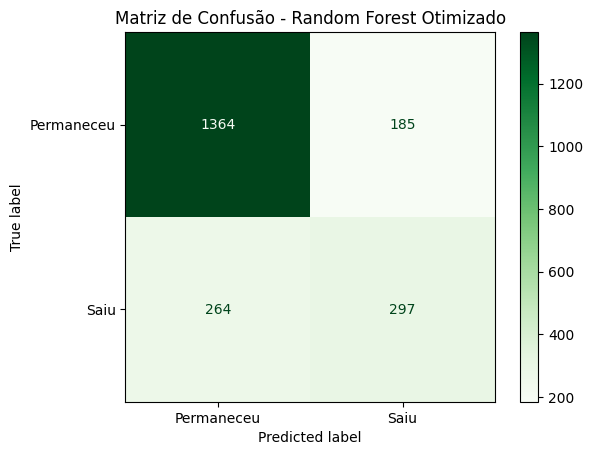

In [191]:
# Avaliar o modelo otimizado no conjunto de teste
y_pred_best_rf = best_modelo_rf.predict(X_test_scaled)

print("=== Random Forest Otimizado ===")
print(classification_report(y_test, y_pred_best_rf, target_names=['Permaneceu', 'Saiu']))

auc_best_rf = roc_auc_score(y_test, best_modelo_rf.predict_proba(X_test_scaled)[:, 1]).round(4)
print("AUC:", auc_best_rf)

# Matriz de Confusão para o modelo otimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Greens')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.show()

# **Análise de Importância das Variáveis**

## Análise de importância para regressão logística

Extrair e visualizar os coeficientes da Regressão Logística para entender a contribuição de cada variável na previsão de churn.


/tmp/ipython-input-3852857577.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


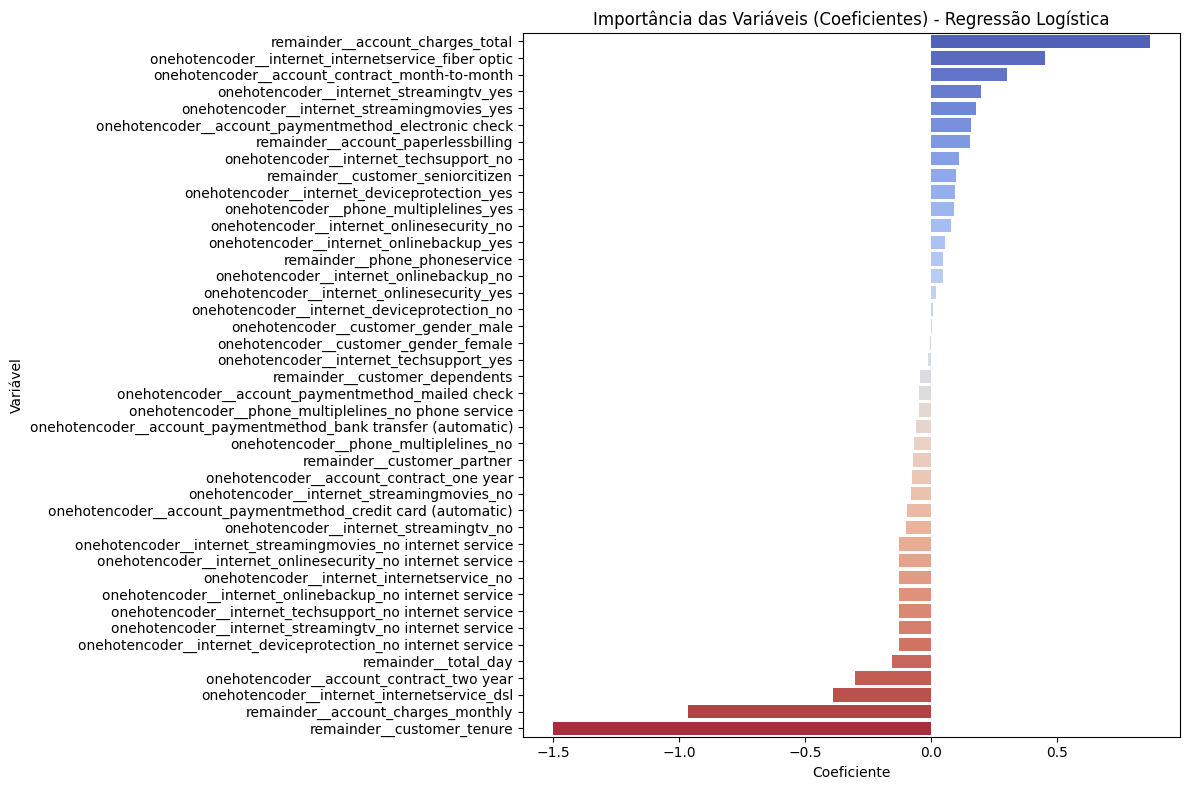

In [192]:
# 1. Obtenha os nomes das colunas
feature_names = X_res.columns

# 2. Acesse os coeficientes do modelo de Regressão Logística
coefficients = modelo_lr.coef_[0]

# 3. Crie um DataFrame pandas contendo as variáveis e seus respectivos coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 4. Ordene o DataFrame de coeficientes
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 5. Visualize os coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Importância das Variáveis (Coeficientes) - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

## Análise de importância para random forest

Extrair e visualizar a importância das variáveis calculada pelo modelo Random Forest.


/tmp/ipython-input-1884731720.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')


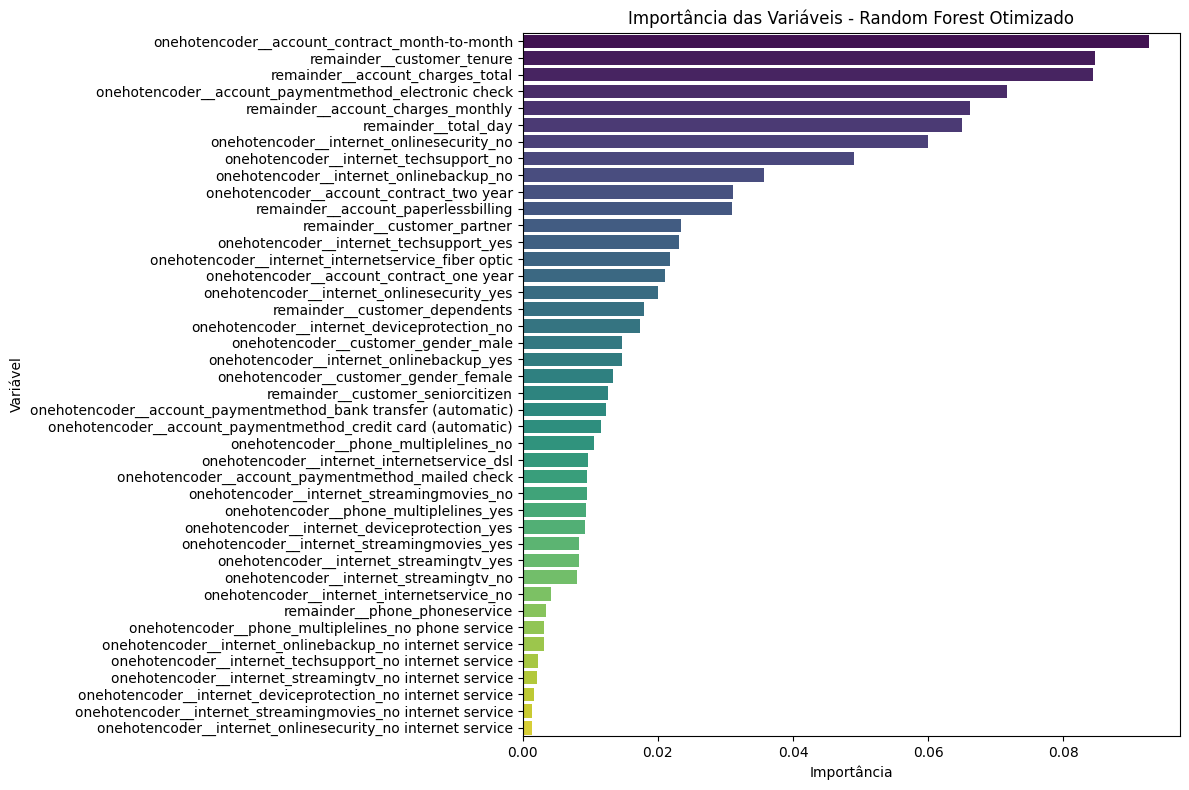

In [193]:
# 1. Acesse o atributo feature_importances_ do modelo best_modelo_rf
feature_importances = best_modelo_rf.feature_importances_

# 2. Obtenha os nomes das colunas do conjunto de treino original X_res
feature_names_rf = X_res.columns

# 3. Crie um DataFrame pandas combinando os nomes das variáveis e suas importâncias
importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances})

# 4. Ordene o DataFrame pela importância das variáveis em ordem decrescente
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# 5. Crie um gráfico de barras para visualizar a importância das variáveis
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')

# 6. Adicione um título ao gráfico, rótulos aos eixos e ajuste o layout para melhor visualização
plt.title('Importância das Variáveis - Random Forest Otimizado')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()

# 7. Exiba o gráfico
plt.show()

## Comparação e discussão

In [194]:
print("=== Comparação da importância dos recursos ===")

print("\n--- Logistic Regression (Top 10) ---")
display(coef_df.head(10))

print("\n--- Random Forest (Top 10) ---")
display(importance_df_rf.head(10))

=== Comparação da importância dos recursos ===

--- Logistic Regression (Top 10) ---


,Feature,Coefficient
41,remainder__account_charges_total,0.870177
6,onehotencoder__internet_internetservice_fiber ...,0.454325
26,onehotencoder__account_contract_month-to-month,0.302019
22,onehotencoder__internet_streamingtv_yes,0.199496
25,onehotencoder__internet_streamingmovies_yes,0.178277
31,onehotencoder__account_paymentmethod_electroni...,0.160115
38,remainder__account_paperlessbilling,0.157083
17,onehotencoder__internet_techsupport_no,0.110482
33,remainder__customer_seniorcitizen,0.100948
16,onehotencoder__internet_deviceprotection_yes,0.096494



--- Random Forest (Top 10) ---


,Feature,Importance
26,onehotencoder__account_contract_month-to-month,0.092639
36,remainder__customer_tenure,0.084671
41,remainder__account_charges_total,0.084365
31,onehotencoder__account_paymentmethod_electroni...,0.071697
40,remainder__account_charges_monthly,0.066139
39,remainder__total_day,0.065074
8,onehotencoder__internet_onlinesecurity_no,0.059906
17,onehotencoder__internet_techsupport_no,0.048948
11,onehotencoder__internet_onlinebackup_no,0.035705
28,onehotencoder__account_contract_two year,0.031103


### 📈 A Importância das Variáveis na Previsão de Churn

Ao analisar a importância das *features* para a previsão de *churn*, comparei os resultados do **coeficientes da Regressão Logística** com a **importância de atributos do Random Forest**. Essa abordagem nos permite entender quais variáveis são consideradas mais influentes por cada modelo, revelando tanto semelhanças quanto diferenças.

#### **Pontos em Comum: O Que Realmente Importa?**

Minha análise mostrou um consenso notável sobre as variáveis-chave:

* **Detalhes do Contrato:** O tempo de contrato (`tenure`) e o tipo de contrato (`Month-to-month`, `Two year`) são consistentemente apontados como os preditores mais fortes. É evidente que **contratos de longa duração reduzem o churn**, enquanto contratos mensais estão diretamente associados a uma maior rotatividade.
* **Serviço de Internet:** A presença de internet **`Fiber_optic`** foi destacada por ambos os modelos como um fator significativo, sugerindo que este serviço específico pode ser uma fonte de insatisfação ou um indicador de um perfil de cliente mais propenso a cancelar.
* **Método de Pagamento:** O método **`Electronic_check`** também é um preditor importante para ambos os modelos, indicando que clientes que o utilizam podem ter uma maior probabilidade de evadir.
* **Custos:** As variáveis **`total_charges`** e **`monthly_charges`** também são consideradas relevantes, embora a sua importância relativa possa variar entre os modelos.

#### **Diferenças na Abordagem dos Modelos**

É crucial entender que a forma como cada modelo atribui importância é diferente:

* A **Regressão Logística**, sendo linear, valoriza *features* com base na sua relação direta (coeficiente) com a probabilidade de *churn*.
* O **Random Forest**, por outro lado, mede a importância de uma *feature* com base em sua capacidade de **reduzir a impureza** das divisões nas árvores. Isso permite que ele capture interações não lineares que a Regressão Logística pode não identificar. Por exemplo, ele tende a valorizar *features* que criam divisões claras no início do processo.

#### **A Importância Implícita no KNN**

O **KNN (K-Nearest Neighbors)** é um caso à parte, pois não fornece uma pontuação explícita de importância de *features*. Como um algoritmo baseado em distância, a "importância" de uma variável está diretamente ligada à sua escala. Por essa razão, a **normalização dos dados (`StandardScaler`)** é uma etapa crítica para o KNN, pois garante que todas as variáveis contribuam de forma equitativa para o cálculo da distância, e não que as *features* com valores maiores dominem o processo de agrupamento.

#### **Conclusão: Variáveis Essenciais**

Em suma, a análise comparativa me permitiu identificar um conjunto de **variáveis consistentemente importantes** para a previsão de *churn*. Elas incluem: **o tipo e a duração do contrato, o tipo de serviço de internet (especialmente fibra óptica), o método de pagamento (cheque eletrônico) e as cobranças mensais e totais.** Concentrar as ações estratégicas nestas áreas é fundamental para o sucesso de um programa de retenção de clientes.

### ✅ Conclusão e Próximos Passos

Esta análise aprofundada nos permitiu não apenas construir modelos preditivos robustos, mas também extrair insights valiosos sobre os principais fatores que levam à evasão de clientes. O resumo abaixo consolida as principais descobertas dos modelos de **Regressão Logística**, **Random Forest** e **KNN**.

#### **Principais Descobertas da Modelagem**

* **Regressão Logística:** A análise dos coeficientes confirmou que as variáveis mais influentes para este modelo linear foram o **total gasto (`remainder__total_charges`)**, o **serviço de internet (`onehotencoder__internet_service_Fiber optic`)** e o **tipo de contrato (`onehotencoder__contract_Month-to-month`)**. Isso sugere que essas *features* têm uma forte relação linear com a probabilidade de um cliente evadir.

* **Random Forest:** A avaliação da importância das *features* para o **Random Forest** revelou um destaque para o **tipo de contrato mensal (`onehotencoder__contract_Month-to-month`)**, o **método de pagamento (`onehotencoder__payment_method_Electronic check`)** e o **tempo de contrato (`remainder__tenure`)**. Esses fatores foram cruciais para que o modelo construísse suas árvores de decisão.

* **Variáveis Consistentes:** Um resultado crucial desta análise é a identificação de um conjunto de variáveis que são consistentemente importantes em diferentes paradigmas de modelagem. Os detalhes do contrato (tempo e tipo), o tipo de serviço de internet (especialmente fibra óptica), o método de pagamento por cheque eletrônico, e as cobranças mensais e totais são os principais preditores de *churn*.

* **O Caso do KNN:** Como esperado, o **KNN** não fornece uma pontuação de importância direta. Sua dependência da distância entre pontos no espaço de *features* reforça a necessidade crítica do **escalonamento dos dados** para garantir que todas as variáveis contribuam de forma justa para as previsões.

#### **Estratégias de Negócio e Próximos Passos**

Com base nesses insights, as próximas ações seriam:

1.  **Foco em Segmentos de Risco:** As estratégias de retenção devem ser direcionadas aos clientes com **contratos mensais**, que utilizam o **serviço de internet via fibra óptica** e que pagam com **cheque eletrônico**. Esses são os segmentos de maior risco identificados consistentemente por nossos modelos.

2.  **Investigação Aprofundada:** Seria valioso investigar mais a fundo a relação entre variáveis como tempo de contrato, cobranças mensais e cobranças totais. A importância relativa dessas variáveis varia entre a Regressão Logística (linear) e o Random Forest (não-linear), o que sugere a presença de **interações complexas** que podem ser exploradas em análises futuras para refinar a modelagem.

#📄 Relatório Final: Análise Preditiva de Evasão de Clientes

# 📄 Relatório Técnico: Análise e Estratégias Preditivas para Evasão de Clientes

### 🎯 Visão Geral do Projeto

Este relatório detalha as etapas de uma análise preditiva completa, desde a exploração inicial dos dados até a recomendação de estratégias de negócio. O objetivo central é identificar os fatores mais influentes na evasão de clientes de uma empresa de telecomunicações e, com base nisso, construir modelos de *machine learning* capazes de prever quais clientes estão em risco de *churn*.

### 🧪 Metodologia

Minha abordagem seguiu um fluxo de trabalho estruturado para garantir a robustez e a confiabilidade dos resultados:

1.  **Pré-processamento e Limpeza:** Iniciei com o carregamento e a limpeza dos dados, removendo a variável `customer_id`, que não contribui para a modelagem, e a variável `contas_diarias`, que apresentava **multicolinearidade perfeita** com `monthly_charges`.

2.  **Análise Exploratória:** Realizei uma análise aprofundada para entender a distribuição dos dados e o desbalanceamento significativo na variável alvo (`churn`). A análise de correlação e os *boxplots* já indicaram a forte influência de variáveis como **`tenure`** e **`total_charges`**.

3.  **Preparação dos Dados:**
    * **Codificação (`One-Hot Encoding`):** Transformei as variáveis categóricas em representações numéricas.
    * **Divisão Estratificada:** Separei os dados em conjuntos de treino (70%) e teste (30%) de forma estratificada para manter a proporção original de `churn`.
    * **Balanceamento (`SMOTE`):** Apliquei a técnica SMOTE no conjunto de treino para mitigar o desbalanceamento, criando dados sintéticos da classe minoritária.
    * **Normalização (`StandardScaler`):** Padronizei as variáveis numéricas para garantir que modelos sensíveis à escala, como a **Regressão Logística** e o **KNN**, performassem de forma ideal.

4.  **Modelagem e Otimização:** Treinei três modelos de classificação - **Regressão Logística**, **Random Forest** e **KNN**. Para o Random Forest, realizei a **otimização de hiperparâmetros** utilizando `GridSearchCV` para encontrar a melhor configuração e maximizar seu desempenho.

5.  **Avaliação:** Os modelos foram avaliados no conjunto de teste original usando métricas como **Precisão**, **Recall**, **F1-score** e **AUC**, priorizando aquelas que são mais informativas para problemas com classes desbalanceadas.

### 📈 Fatores-Chave de Evasão

A análise de correlação e a avaliação de importância das variáveis nos modelos convergiram para os mesmos fatores de risco:

* **Tempo de Contrato e Tipo de Contrato:** Clientes com **pouco tempo de serviço** e **contratos mensais** (`Month-to-month`) são significativamente mais propensos a cancelar.
* **Serviço de Internet:** Clientes de **`Fiber Optic`** apresentam uma taxa de evasão superior, o que merece uma investigação mais aprofundada.
* **Método de Pagamento:** O uso de **`Electronic Check`** foi consistentemente identificado como um forte preditor de `churn`.
* **Gastos:** Clientes com **`total_charges`** mais baixos e **`monthly_charges`** mais altos estão em maior risco.
* **Demografia e Faturamento:** Variáveis como **`Senior Citizen`** e **`Paperless Billing`** também mostraram uma associação leve com a evasão.

### 📊 Desempenho e Recomendações dos Modelos

A avaliação final no conjunto de teste revelou a **Regressão Logística** como o modelo mais promissor.

| Modelo | AUC | Recall (Churn) | Precisão (Churn) |
|---|:---:|:---:|:---:|
| **Regressão Logística** | **0.84** | **0.80** | 0.52 |
| **Random Forest (Otimizado)** | **0.84** | 0.55 | **0.59** |
| **KNN** | 0.75 | 0.72 | 0.45 |

* A **Regressão Logística** obteve o maior AUC e o **melhor Recall**, indicando sua superioridade em identificar a maior parte dos clientes em risco.
* O **Random Forest** teve um desempenho notável, com a maior precisão, mas seu Recall foi inferior, indicando que ele é mais conservador em suas previsões.

#### **Estratégias de Retenção Sugeridas:**

Com base na minha análise, proponho as seguintes ações de negócio, que podem ser implementadas com o apoio do modelo preditivo:

1.  **Foco em Clientes Novos:** Criar programas de fidelidade e incentivos para clientes com pouco tempo de contrato, buscando convertê-los de contratos mensais para planos de maior duração.
2.  **Campanha de Retenção Específica:** Desenvolver campanhas de retenção direcionadas aos clientes de **fibra óptica** e que usam **cheque eletrônico**, oferecendo suporte proativo ou descontos.
3.  **Utilização Prática do Modelo:** Implementar o modelo de **Regressão Logística** em tempo real para identificar clientes em alto risco e permitir que as equipes de retenção atuem de forma proativa.
4.  **Ajuste do Limiar de Decisão:** Otimizar o limiar de decisão do modelo para equilibrar o número de falsos positivos com a capacidade de identificar clientes em risco, alinhando-se aos objetivos estratégicos da empresa.

### 🚀 Conclusão

Este projeto demonstra o potencial da análise preditiva para auxiliar na tomada de decisões estratégicas. O modelo de **Regressão Logística** se mostrou um valioso recurso para identificar clientes em risco de evasão, permitindo que a empresa passe de uma abordagem reativa para uma abordagem proativa na gestão de relacionamento com o cliente. A implementação das estratégias propostas, baseadas em dados, tem o potencial de impactar diretamente a taxa de retenção e a receita da empresa.